 regression warmup

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from prepare_utils import get_numeric_columns
from prepare_utils import create_clusters
from prepare_utils import compare_ttests
from prepare_utils import filter_columns
from prepare_utils import regressiontest


%matplotlib inline
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn import tree

import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import pearsonr

import graphviz
from graphviz import Graph

seed = 123

from pydataset import data

%matplotlib notebook

In [2]:
swiss = data('swiss')

In [3]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
Fertility           47 non-null float64
Agriculture         47 non-null float64
Examination         47 non-null int64
Education           47 non-null int64
Catholic            47 non-null float64
Infant.Mortality    47 non-null float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [4]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [5]:
Ttest_df = compare_ttests(swiss,'Fertility')
# Ttest_df

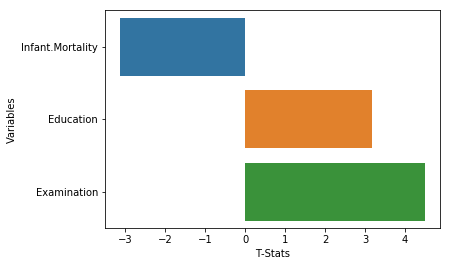

In [6]:
ax = sns.barplot(x="T-Stats", y="Variables", data=Ttest_df)

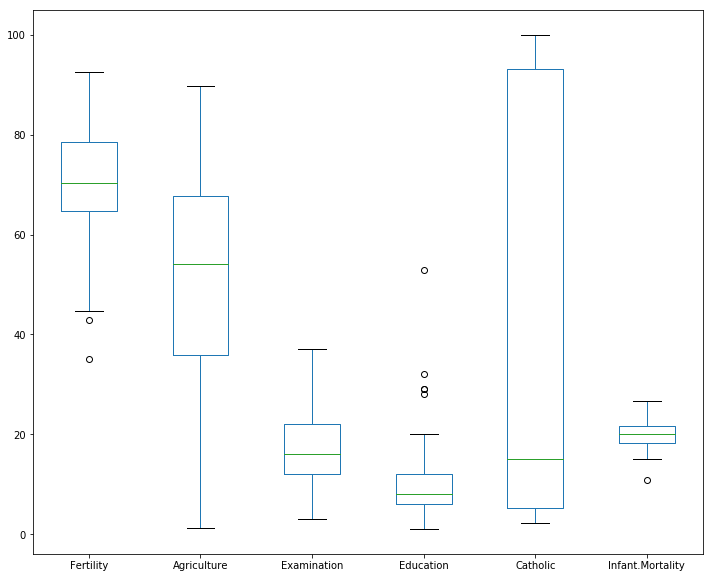

In [15]:
swiss.plot.box(figsize=(12,10))

In [8]:
yfeature = 'Fertility'
xfeatures = ['Agriculture','Catholic']
mse, r2, corrdict, coeff = regressiontest(swiss,xfeatures,yfeature,.75)
print(xfeatures,'   mse=',mse,'   rscore=',r2)

['Agriculture', 'Catholic']    mse= 703.3219342769518    rscore= -4.173395799920726


In [9]:
yfeature = 'Fertility'
xfeatures = ['Education','Examination']
mse, r2, corrdict, coeff = regressiontest(swiss,xfeatures,yfeature,.75)
print(xfeatures,'   mse=',mse,'   rscore=',r2)

['Education', 'Examination']    mse= 1221.1249332113318    rscore= -7.982177709484532


In [10]:
yfeature = 'Fertility'
xfeatures = ['Agriculture','Catholic','Education','Examination', 'Infant.Mortality']
mse, r2, corrdict, coeff = regressiontest(swiss,xfeatures,yfeature,.75)
print(xfeatures,'   mse=',mse,'   rscore=',r2)

['Agriculture', 'Catholic', 'Education', 'Examination', 'Infant.Mortality']    mse= 72.14746509240884    rscore= 0.4693079019813151


In [11]:
corrdict

{'Agriculture': (0.23123536079545792, 0.1813788698235232),
 'Examination': (-0.5640098853959173, 0.0004177109978298131),
 'Education': (-0.5491458447439576, 0.0006347387618541451),
 'Catholic': (0.4512691874913661, 0.00650945924621595),
 'Infant.Mortality': (0.2606430139926998, 0.13046755300351903)}

In [12]:
coeff

[('Agriculture', 0.011314726588874849),
 ('Catholic', 0.1551444039927462),
 ('Education', -0.7822059028691685),
 ('Examination', 0.08554277486774815),
 ('Infant.Mortality', 3.5133161867710068)]

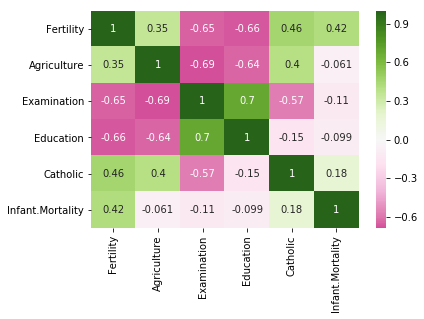

In [18]:
sns.heatmap(swiss.corr(), cmap='PiYG', center=0, annot=True)